# Prediction Using Supervised ML

Importing necessary liabraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

Extracting and Exploring the data

In [4]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


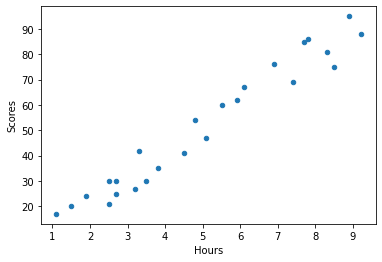

In [8]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [11]:
hours=data['Hours']
scores=data['Scores']

<AxesSubplot:xlabel='Scores', ylabel='Density'>

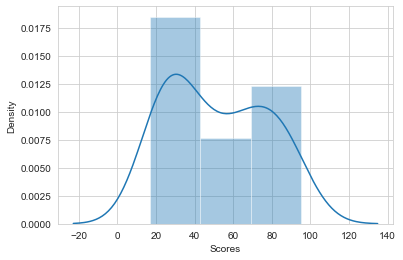

In [26]:
sns.distplot(scores)

<AxesSubplot:xlabel='Hours', ylabel='Density'>

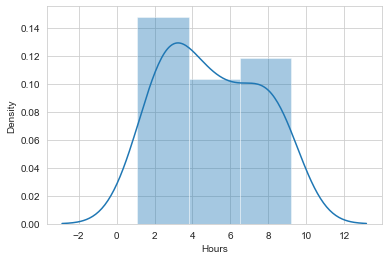

In [27]:
sns.distplot(hours)

Linear Regression

In [28]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [29]:
import sklearn

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

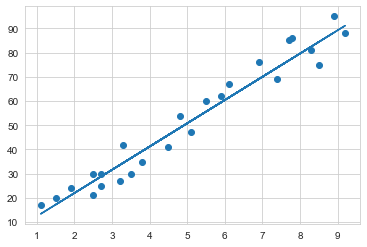

In [38]:
m = reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

In [33]:
y_pred=reg.predict(X_test)

In [34]:
import pandas as pd
actual_predicted=pd.DataFrame({'Percentage':y_test,'Predicted':y_pred})
actual_predicted

,Percentage,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


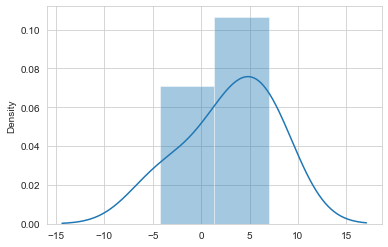

In [35]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [36]:
h = 8.5
s=reg.predict([[h]])
print('If a student studies for {} hours/day, he/she wills score {} % in examination.'.format(h,s))

If a student studies for 8.5 hours/day, he/she wills score [84.37313932] % in examination.


Model Evaluation

In [37]:
import scipy
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
